<a href="https://colab.research.google.com/github/icarocarmona/Tech-Challenges-DTAT-Grupo-26/blob/main/Tech_BVSP_Fase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

# Especifique o símbolo da empresa e o intervalo de datas desejado
symbol = '^BVSP'
start_date = '2018-01-01'
end_date = '2024-01-17'


In [ ]:
# Use a função download para obter os dados
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Salve os dados em um arquivo CSV
csv_filename = 'dados_bovespa.csv'
df.to_csv(csv_filename)

print(f'Dados salvos em {csv_filename}')

Dados salvos em dados_bovespa.csv


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1497 entries, 2018-01-02 to 2024-01-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1497 non-null   float64
 1   High       1497 non-null   float64
 2   Low        1497 non-null   float64
 3   Close      1497 non-null   float64
 4   Adj Close  1497 non-null   float64
 5   Volume     1497 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 81.9 KB


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,77891.0,2880300
2018-01-03,77889.0,78414.0,77602.0,77995.0,77995.0,3142200
2018-01-04,77998.0,79135.0,77998.0,78647.0,78647.0,3486100
2018-01-05,78644.0,79071.0,78218.0,79071.0,79071.0,2747100
2018-01-08,79070.0,79395.0,78631.0,79379.0,79379.0,2550800


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# tendência - direção
# sazonalidade - recorrência das oscilações
# resíduo - o que sobra do sinal

In [ ]:
df = pd.read_csv("/content/dados_bovespa.csv")
df.head


<bound method NDFrame.head of             Date      Open      High       Low     Close  Adj Close    Volume
0     2018-01-02   76403.0   77909.0   76403.0   77891.0    77891.0   2880300
1     2018-01-03   77889.0   78414.0   77602.0   77995.0    77995.0   3142200
2     2018-01-04   77998.0   79135.0   77998.0   78647.0    78647.0   3486100
3     2018-01-05   78644.0   79071.0   78218.0   79071.0    79071.0   2747100
4     2018-01-08   79070.0   79395.0   78631.0   79379.0    79379.0   2550800
...          ...       ...       ...       ...       ...        ...       ...
1492  2024-01-10  131447.0  131628.0  130438.0  130841.0   130841.0   8958400
1493  2024-01-11  130841.0  131308.0  129898.0  130649.0   130649.0   9761700
1494  2024-01-12  130652.0  131927.0  130410.0  130988.0   130988.0  10661900
1495  2024-01-15  130988.0  131606.0  130253.0  131521.0   131521.0   5746600
1496  2024-01-16  131515.0  131517.0  129147.0  129294.0   129294.0  11911300

[1497 rows x 7 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1497 entries, 2018-01-02 to 2024-01-16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1497 non-null   object 
 1   Open       1497 non-null   float64
 2   High       1497 non-null   float64
 3   Low        1497 non-null   float64
 4   Close      1497 non-null   float64
 5   Adj Close  1497 non-null   float64
 6   Volume     1497 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 93.6+ KB


In [ ]:
#transformar index em data
df.index = pd.to_datetime(df['Date'])

In [ ]:
# deixando apenas uma coluna data
df.drop("Date", inplace=True, axis=1)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,76403.0,77909.0,76403.0,77891.0,77891.0,2880300
2018-01-03,77889.0,78414.0,77602.0,77995.0,77995.0,3142200
2018-01-04,77998.0,79135.0,77998.0,78647.0,78647.0,3486100
2018-01-05,78644.0,79071.0,78218.0,79071.0,79071.0,2747100
2018-01-08,79070.0,79395.0,78631.0,79379.0,79379.0,2550800


In [ ]:
df.loc['2018-01-04']

Open           77998.0
High           79135.0
Low            77998.0
Close          78647.0
Adj Close      78647.0
Volume       3486100.0
Name: 2018-01-04 00:00:00, dtype: float64

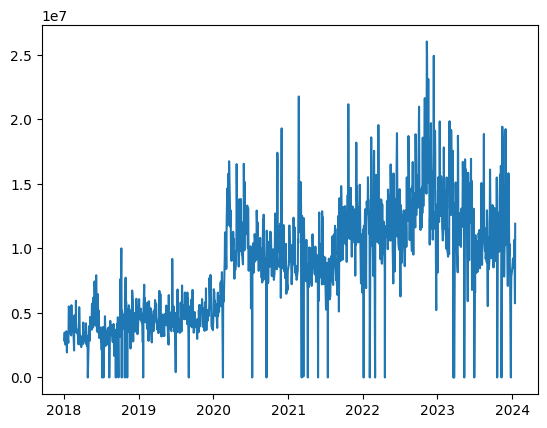

In [ ]:
#plt.plot(df.index, df.Open, df.High, df.Low, df.Close, df.Volume)
plt.plot(df.index, df.Volume)